In [14]:
import pandas as pd
import torch

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

df = pd.read_csv("~/dev/gachon-ai/datasets/BP_data.csv")
df.drop("Patient_Number", axis=1)
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [15]:
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [16]:
df["Genetic_Pedigree_Coefficient"] = df["Genetic_Pedigree_Coefficient"].fillna(df["Genetic_Pedigree_Coefficient"].mean())
df["alcohol_consumption_per_day"] = df["alcohol_consumption_per_day"].fillna(df["alcohol_consumption_per_day"].mean())
df["Pregnancy"] = df["Pregnancy"].fillna(df["Pregnancy"].mean())

In [17]:
df.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

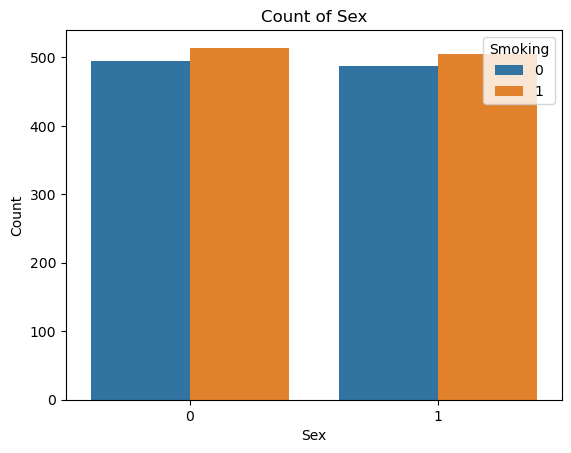

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# countplot 그리기
sns.countplot(x='Sex', hue='Smoking',data=df)
plt.title('Count of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

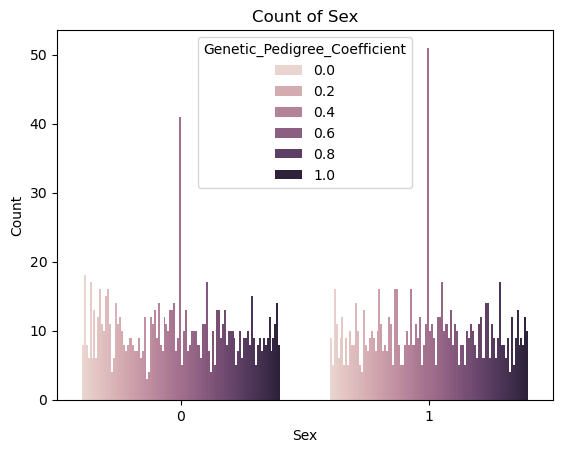

In [39]:
sns.countplot(x='Sex', hue='Genetic_Pedigree_Coefficient',data=df)
plt.title('Count of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

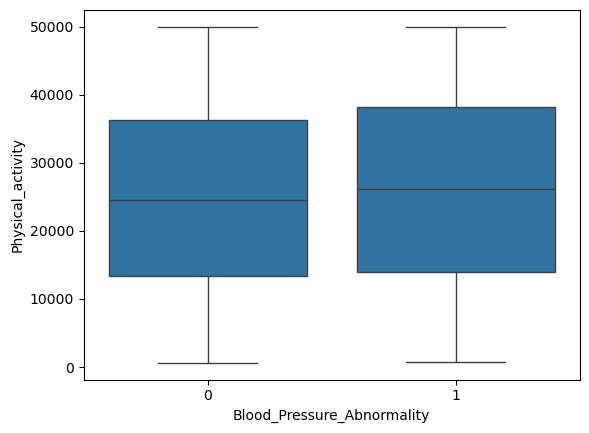

In [50]:
sns.boxplot(y="Physical_activity", x="Blood_Pressure_Abnormality", data=df)

plt.show()

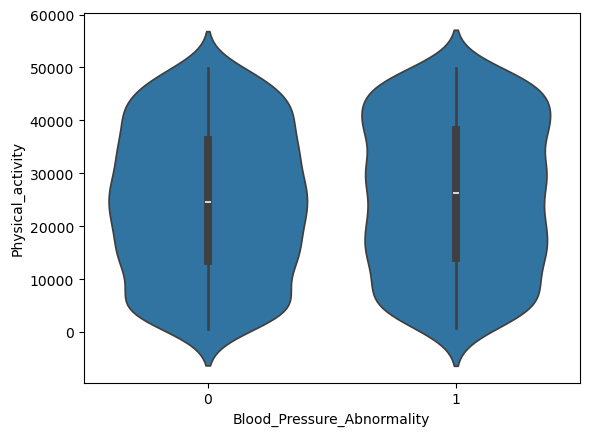

In [49]:
sns.violinplot(y="Physical_activity", x="Blood_Pressure_Abnormality", data=df)

plt.show()

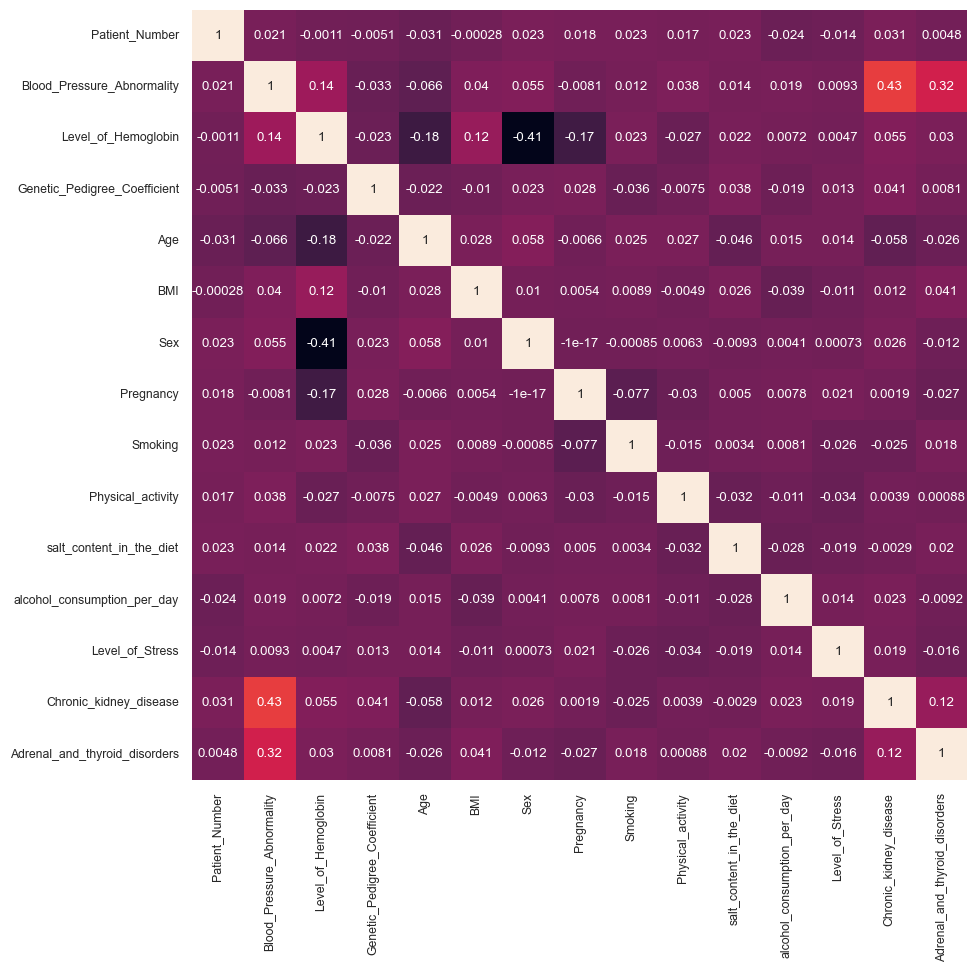

In [51]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()


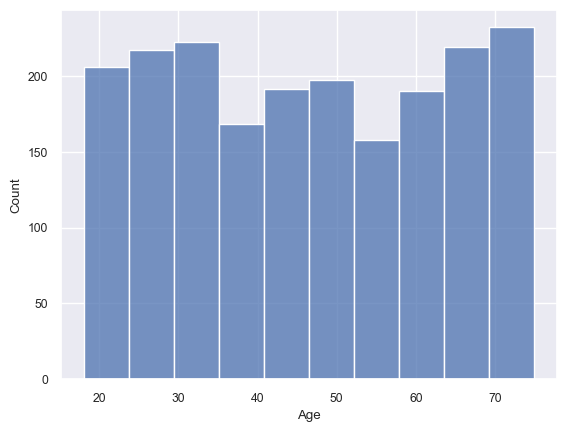

In [55]:
sns.histplot(data=df, x='Age', bins=10, kde=False)
plt.show()

/var/folders/_x/m11gzvm52dvb5qqr1v_nwhxw0000gn/T/ipykernel_42474/2766039577.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


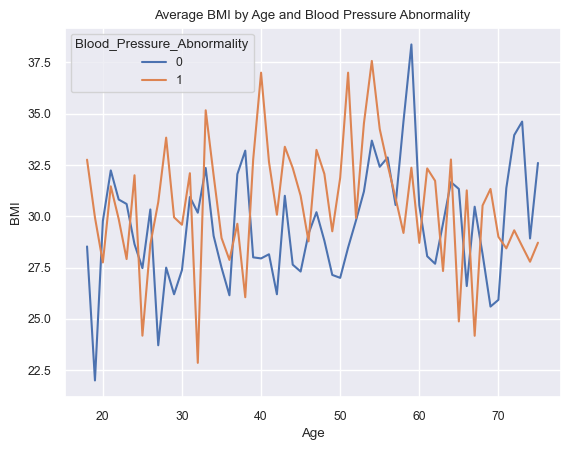

In [59]:
sns.lineplot(
    x="Age",
    y="BMI",
    hue="Blood_Pressure_Abnormality",
    data=df,
    estimator="mean",
    ci=None
)
plt.title("Average BMI by Age and Blood Pressure Abnormality")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.grid(True)
plt.show()

/var/folders/_x/m11gzvm52dvb5qqr1v_nwhxw0000gn/T/ipykernel_42474/2575286640.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


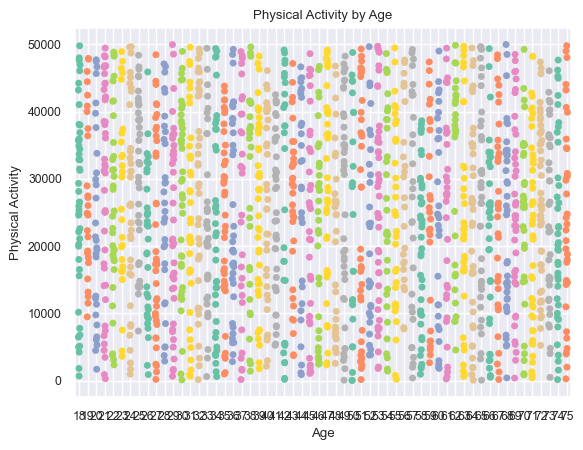

In [ ]:
sns.stripplot(
    x="Age",
    y="Physical_activity",
    data=df,
    jitter=True,
    palette="Set2"
)
plt.title("Physical Activity by Age")
plt.xlabel("Age")
plt.ylabel("Physical Activity")
plt.grid(True)
plt.show()

In [18]:
y = df["Blood_Pressure_Abnormality"]
x = df.drop("Blood_Pressure_Abnormality", axis=1)
y = pd.get_dummies(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
x_train = torch.tensor(x_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.int64)
x_test = torch.tensor(x_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.int64)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 14]),
 torch.Size([400, 14]),
 torch.Size([1600, 2]),
 torch.Size([400, 2]))

In [21]:

# Create DataLoader
train_dataset = TensorDataset(x_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(x_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [22]:
class BPDense(nn.Module):
    def __init__(self):
        super(BPDense, self).__init__()
        self.fc1 = nn.Linear(14, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = BPDense()

In [23]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        labels = labels.float()
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            

            print(predicted.shape, labels.shape)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 2.1741, Accuracy: 0.00%
Epoch 2/20, Loss: 2.0242, Accuracy: 0.00%
Epoch 3/20, Loss: 2.4843, Accuracy: 0.00%
Epoch 4/20, Loss: 2.2627, Accuracy: 0.00%
Epoch 5/20, Loss: 1.9898, Accuracy: 0.00%
Epoch 6/20, Loss: 2.1003, Accuracy: 0.00%
Epoch 7/20, Loss: 1.4099, Accuracy: 0.00%
Epoch 8/20, Loss: 1.8599, Accuracy: 0.00%
Epoch 9/20, Loss: 1.9632, Accuracy: 0.00%
Epoch 10/20, Loss: 1.5103, Accuracy: 0.00%
Epoch 11/20, Loss: 2.4626, Accuracy: 0.00%
Epoch 12/20, Loss: 2.7096, Accuracy: 0.00%
Epoch 13/20, Loss: 1.4544, Accuracy: 0.00%
Epoch 14/20, Loss: 2.0872, Accuracy: 0.00%
Epoch 15/20, Loss: 1.5389, Accuracy: 0.00%
Epoch 16/20, Loss: 3.2314, Accuracy: 0.00%
Epoch 17/20, Loss: 3.4574, Accuracy: 0.00%
Epoch 18/20, Loss: 1.9329, Accuracy: 0.00%
Epoch 19/20, Loss: 3.4827, Accuracy: 0.00%
Epoch 20/20, Loss: 2.0110, Accuracy: 0.00%
Training complete.
